In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('sales_data_sample.csv' , encoding = 'unicode_escape')

In [4]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [5]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [6]:
df.drop(['ADDRESSLINE1' , 'ADDRESSLINE2' , 'POSTALCODE' , 'STATE' , 'PHONE'] , axis = 1 , inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  CITY              2823 non-null   object 
 15  COUNTRY           2823 non-null   object 
 16  TERRITORY         1749 non-null   object 


In [8]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

In [9]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
CITY                   0
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [11]:
#RFM analysis
# recency = orderdate
#frequency = ordernumber
# monetary = sales
import datetime as dt
snapshot_date = df['ORDERDATE'].max() + dt.timedelta(days = 1)  #remember this
df_rfm = df.groupby(['CUSTOMERNAME']).agg({
    'ORDERDATE' : lambda x : (snapshot_date - x.max()).days,    #remember this
    'ORDERNUMBER' : 'count',
    'SALES': 'sum'
})

df_rfm.rename(columns = {'ORDERDATE': 'Recency' , 'ORDERNUMBER' : 'Frequency' , 'SALES' : 'Monetary'} , inplace = True)

In [12]:
df_rfm.head()

,Recency,Frequency,Monetary
CUSTOMERNAME,,,
"AV Stores, Co.",196,51,157807.81
Alpha Cognac,65,20,70488.44
Amica Models & Co.,265,26,94117.26
"Anna's Decorations, Ltd",84,46,153996.13
Atelier graphique,188,7,24179.96


In [17]:
#labels
df_rfm['M'] = pd.qcut(df_rfm['Monetary'] , q = 4 , labels = range(1,5))
df_rfm['R'] = pd.qcut(df_rfm['Recency'] , q = 4 , labels = list(range(4,0,-1)))
df_rfm['F'] = pd.qcut(df_rfm['Frequency'] , q = 4 , labels = range(1,5))

In [18]:
df_rfm.head()

,Recency,Frequency,Monetary,M,R,F
CUSTOMERNAME,,,,,,
"AV Stores, Co.",196,51,157807.81,4,2,4
Alpha Cognac,65,20,70488.44,2,4,2
Amica Models & Co.,265,26,94117.26,3,1,2
"Anna's Decorations, Ltd",84,46,153996.13,4,3,4
Atelier graphique,188,7,24179.96,1,2,1


In [21]:
df_rfm['RFM_Score'] = df_rfm[['R', 'M', 'F']].sum(axis=1)
df_rfm.head()

,Recency,Frequency,Monetary,M,R,F,RFM_Score
CUSTOMERNAME,,,,,,,
"AV Stores, Co.",196,51,157807.81,4,2,4,10
Alpha Cognac,65,20,70488.44,2,4,2,8
Amica Models & Co.,265,26,94117.26,3,1,2,6
"Anna's Decorations, Ltd",84,46,153996.13,4,3,4,11
Atelier graphique,188,7,24179.96,1,2,1,4


In [25]:
#function to segregate customers
def rfm_level(df):
    if bool(df['RFM_Score'] >= 10):
        return 'High Value Customer'
    
    elif bool(df['RFM_Score'] < 10) and bool(df['RFM_Score'] >= 6):
        return 'Mid Value Customer'
    else:
        return 'Low Value Customer'
df_rfm['RFM_Level'] = df_rfm.apply(rfm_level, axis = 1)
df_rfm.head()


,Recency,Frequency,Monetary,M,R,F,RFM_Score,RFM_Level
CUSTOMERNAME,,,,,,,,
"AV Stores, Co.",196,51,157807.81,4,2,4,10,High Value Customer
Alpha Cognac,65,20,70488.44,2,4,2,8,Mid Value Customer
Amica Models & Co.,265,26,94117.26,3,1,2,6,Mid Value Customer
"Anna's Decorations, Ltd",84,46,153996.13,4,3,4,11,High Value Customer
Atelier graphique,188,7,24179.96,1,2,1,4,Low Value Customer


In [26]:
data = df_rfm[['Recency' , 'Frequency' , 'Monetary']]
data

,Recency,Frequency,Monetary
CUSTOMERNAME,,,
"AV Stores, Co.",196,51,157807.81
Alpha Cognac,65,20,70488.44
Amica Models & Co.,265,26,94117.26
"Anna's Decorations, Ltd",84,46,153996.13
Atelier graphique,188,7,24179.96
...,...,...,...
"Vida Sport, Ltd",275,31,117713.56
Vitachrome Inc.,208,25,88041.26
"Volvo Model Replicas, Co",194,19,75754.88


In [28]:
#highly skewed hence log transformation
data_log = np.log(data)
data_log

,Recency,Frequency,Monetary
CUSTOMERNAME,,,
"AV Stores, Co.",5.278115,3.931826,11.969133
Alpha Cognac,4.174387,2.995732,11.163204
Amica Models & Co.,5.579730,3.258097,11.452297
"Anna's Decorations, Ltd",4.430817,3.828641,11.944683
Atelier graphique,5.236442,1.945910,10.093279
...,...,...,...
"Vida Sport, Ltd",5.616771,3.433987,11.676009
Vitachrome Inc.,5.337538,3.218876,11.385561
"Volvo Model Replicas, Co",5.267858,2.944439,11.235258


In [34]:
#standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_log)
data_normalized = scaler.transform(data_log)
data_normalized = pd.DataFrame(data_normalized , index= data_log.index , columns= data_log.columns)

In [35]:
data_normalized.describe()

,Recency,Frequency,Monetary
count,9.200000e+01,9.200000e+01,9.200000e+01
mean,2.866065e-16,-2.431630e-16,3.071516e-15
std,1.005479e+00,1.005479e+00,1.005479e+00
min,-3.510298e+00,-3.667710e+00,-3.817951e+00
25%,-2.442876e-01,-4.140490e-01,-3.932980e-01
50%,3.714115e-01,6.112406e-02,-4.048629e-02
75%,5.299835e-01,4.458305e-01,5.170772e-01
max,1.119245e+00,4.030399e+00,3.916324e+00


In [36]:
from sklearn.cluster import KMeans
import seaborn as sns

In [41]:
sse = {}

for k in range(1, 21):
    kmeans = KMeans(n_clusters = k, random_state = 1)
    kmeans.fit(data_normalized)
    sse[k] = kmeans.inertia_

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

<Axes: title={'center': 'The Elbow Method'}, xlabel='K', ylabel='SSE'>

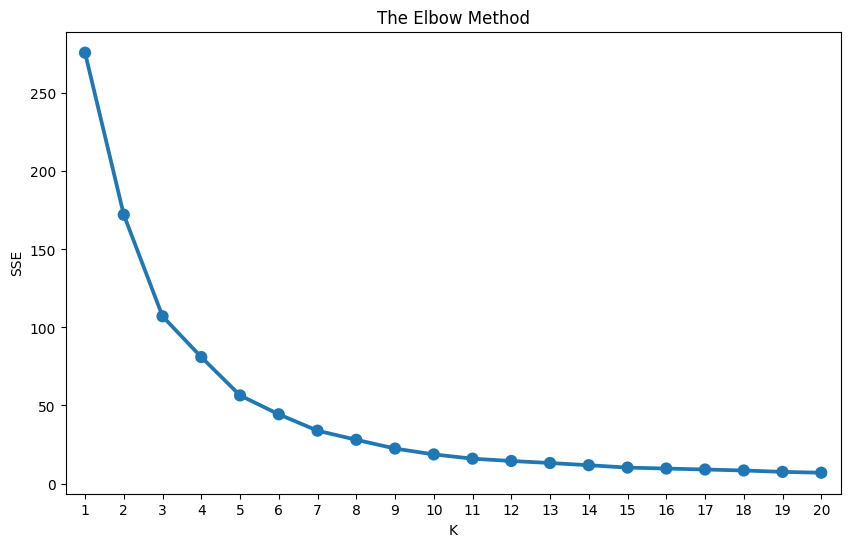

In [44]:
plt.figure(figsize=(10,6))
plt.title('The Elbow Method')

plt.xlabel('K')
plt.ylabel('SSE')


sns.pointplot(x=list(sse.keys()), y = list(sse.values()))

In [45]:
kmeans = KMeans(n_clusters= 5 , random_state=1)
kmeans.fit(data_normalized)
cluster_labels = kmeans.labels_
df_rfm = data.assign(Cluster = cluster_labels)
df_rfm

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Recency,Frequency,Monetary,Cluster
CUSTOMERNAME,,,,
"AV Stores, Co.",196,51,157807.81,3
Alpha Cognac,65,20,70488.44,0
Amica Models & Co.,265,26,94117.26,0
"Anna's Decorations, Ltd",84,46,153996.13,3
Atelier graphique,188,7,24179.96,2
...,...,...,...,...
"Vida Sport, Ltd",275,31,117713.56,3
Vitachrome Inc.,208,25,88041.26,0
"Volvo Model Replicas, Co",194,19,75754.88,0
